In [3]:
# =============================================================================
# ADIM 2: METİN TEMİZLEME VE NORMALİZASYON
# =============================================================================

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

# Veri setini yükle (00_kurulum_ve_veri_hazırlığı.ipynb'den)
df = pd.read_csv('../data/IMDB Dataset.csv')
print(f"✅ Veri seti yüklendi: {df.shape}")

✅ Veri seti yüklendi: (50000, 2)


In [4]:
# =============================================================================
# 1. HTML ETİKETLERİNİ TEMİZLEME
# =============================================================================

def clean_html(text):
    """HTML etiketlerini temizle"""
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# HTML etiketlerini temizle
df['review_no_html'] = df['review'].apply(clean_html)

# Örnek göster
print("HTML temizleme örnegi:")
print("Önce:", df['review'].iloc[0][:200])
print("Sonra:", df['review_no_html'].iloc[0][:200])

HTML temizleme örnegi:
Önce: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo
Sonra: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was it


In [5]:
# =============================================================================
# 2. NOKTALAMA İŞARETLERİNİ TEMİZLEME
# =============================================================================

def clean_punctuation(text):
    """Noktalama işaretlerini temizle"""
    # Noktalama işaretlerini boşluk ile değiştir
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

df['review_no_punct'] = df['review_no_html'].apply(clean_punctuation)

In [6]:
# =============================================================================
# 3. SAYILARI TEMİZLEME
# =============================================================================

def clean_numbers(text):
    """Sayıları temizle"""
    return re.sub(r'\d+', '', text)

df['review_no_numbers'] = df['review_no_punct'].apply(clean_numbers)


In [7]:
# =============================================================================
# 4. KÜÇÜK HARFE ÇEVİRME
# =============================================================================

df['review_lower'] = df['review_no_numbers'].str.lower()


In [8]:
# =============================================================================
# 5. FAZLA BOŞLUKLARI TEMİZLEME
# =============================================================================

def clean_whitespace(text):
    """Fazla boşlukları temizle"""
    return re.sub(r'\s+', ' ', text).strip()

df['review_clean'] = df['review_lower'].apply(clean_whitespace)


In [9]:
# =============================================================================
# 6. TEMİZLEME ÖNCESİ VE SONRASI KARŞILAŞTIRMA
# =============================================================================

print("\n" + "="*50)
print("🔍 TEMİZLEME SONUÇLARI")
print("="*50)

# İlk 3 örnek
for i in range(3):
    print(f"\n📝 Örnek {i+1}:")
    print(f"Orijinal: {df['review'].iloc[i][:150]}...")
    print(f"Temizlenmiş: {df['review_clean'].iloc[i][:150]}...")
    print(f"Uzunluk değişimi: {len(df['review'].iloc[i])} → {len(df['review_clean'].iloc[i])}")


🔍 TEMİZLEME SONUÇLARI

📝 Örnek 1:
Orijinal: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with...
Temizlenmiş: one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me ...
Uzunluk değişimi: 1761 → 1676

📝 Örnek 2:
Orijinal: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes d...
Temizlenmiş: a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting se...
Uzunluk değişimi: 998 → 940

📝 Örnek 3:
Orijinal: I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted come...
Temizlenmiş: i thought this was a wonderful way to spend 

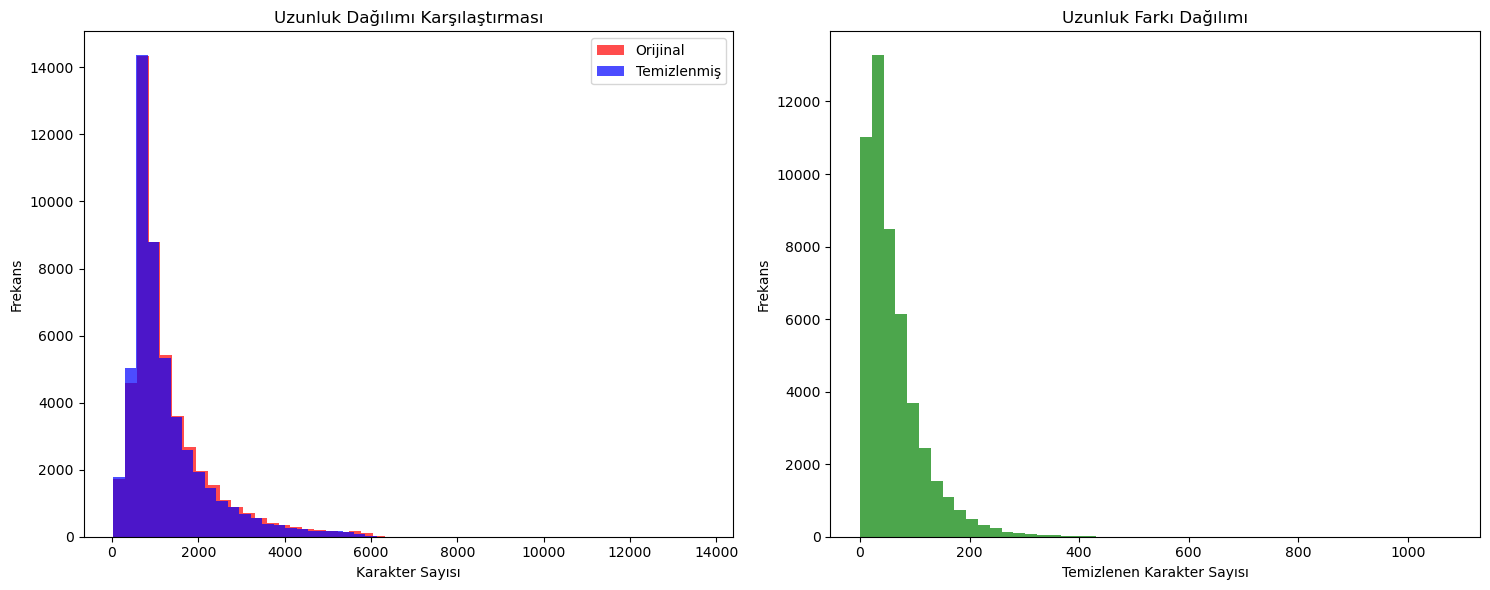

In [10]:
# =============================================================================
# 7. TEMİZLEME ETKİSİNİ GÖRSELLEŞTIRME
# =============================================================================

# Uzunluk karşılaştırması
df['original_length'] = df['review'].str.len()
df['clean_length'] = df['review_clean'].str.len()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Orijinal uzunluk dağılımı
axes[0].hist(df['original_length'], bins=50, alpha=0.7, label='Orijinal', color='red')
axes[0].hist(df['clean_length'], bins=50, alpha=0.7, label='Temizlenmiş', color='blue')
axes[0].set_title('Uzunluk Dağılımı Karşılaştırması')
axes[0].set_xlabel('Karakter Sayısı')
axes[0].set_ylabel('Frekans')
axes[0].legend()

# Uzunluk farkı
length_diff = df['original_length'] - df['clean_length']
axes[1].hist(length_diff, bins=50, alpha=0.7, color='green')
axes[1].set_title('Uzunluk Farkı Dağılımı')
axes[1].set_xlabel('Temizlenen Karakter Sayısı')
axes[1].set_ylabel('Frekans')

plt.tight_layout()
plt.show()

In [11]:
# =============================================================================
# 8. SONUÇLARI KAYDETME
# =============================================================================

# Temizlenmiş veriyi kaydet
df_clean = df[['review_clean', 'sentiment']].copy()
df_clean.columns = ['review', 'sentiment']

print(f"\n✅ Metin temizleme tamamlandı!")
print(f"📊 Temizlenmiş veri boyutu: {df_clean.shape}")
print(f"💾 Sonraki adım için hazır: df_clean değişkeni")


✅ Metin temizleme tamamlandı!
📊 Temizlenmiş veri boyutu: (50000, 2)
💾 Sonraki adım için hazır: df_clean değişkeni


In [14]:
df_clean.to_csv("../data/cleaned_imdb_dataset.csv", index=False)